---
# Brain-Computer Interface data classification
---
# Group 20 : Solution
## by Clément Bernard, Brugeres Maxence and Martin Guyard 


# Introduction of the problem 


The main idea of this challenge is to deal with the interaction of a brain user. 

To do so, a way is to work with the stimulus of the brain signals. 

What is focused here is the method called the gaze-base interaction, which consists of reacting after an eye contact of a user to a screen. The first method used was introducing a threshold of time : whenever a user stays on a given button more than the threshold, it would trigger it. Such method wasn't relevant as the user experience wasn't pleasant. 

Then, it has been experienced a confirmation setup, which required too much attention to the user. 
Afterthat, it has been explored the mental click. The use of motor imagery or mental concentration wasn't efficient.

Moreover, another approach has been the use of EEG patterns that suits the gaze based control. This approach is a passive one, where the user doesn't need to explicitly do something. It takes into account the brain signals that accompany the brain activity.  

Our problem here is a specific paradigm : the **EBCI paradigm**. The computer mouse is replaced by an eye tracker. Then, the classifier should take a decision : click or not. 






## Data collecting procedure 

What was done is a study on 8 different individuals (1 female and people from 21 to 48 yo) whom 2 of those didn't have experiences in gaze based control. 

They used Electroencephalogram (EEG) at 500 Hz and 24 bit voltage resolution. A pre-process was executed to synchronize them with the eye gaze data with custom programs.

For the online detections, the gaze position range shouldn't exceed 2° for 500 - 1000 ms on X and Y. With this criteria and two others (no dwell detected in a 3x3 squared region centered in the previous click for the previous 3000 ms and no dwell detection in any position for 500 ms or 1000 ns depending on the convention), a click was simulated in the game. 




### Gaze controlled game





In order to collect EEG, the experience was realised within a game. The goal is to align color balls in lines. 

To simulate the gaze dwells, a button was added to prevent unwanted actions. To start the gaze detection, a user should gaze dwell this button.

The participants had three different options : fixation on a **button**, a **ball** and a **free cell**. The threshold was 500 or 1000 ms and lead, after each action, to a reaction according what was decided.

To prevent the participants to be too fast, after 4-8 moves, there was a break of 10 seconds.



### User participation

The participants were seated in a chair in front of the computer. For those who have never experienced this game, they had the opportunity to play 2 games of 2 minutes before. 

There were different classes used for the classification : one for the non-controlling fixations, another one for the button fixations (for the training set 1) and the last one for all controlling fixations (training set 2).
The aim of creating two training sets is to use different model because the use of the button differs from the other uses. 

## Data exploration

We have small fragments of EEG. There are 19 channels (which is basically the sensors placed on the user's head).


We have this data in polar coordinates, which can be converted easily to cartesian coordinates : 

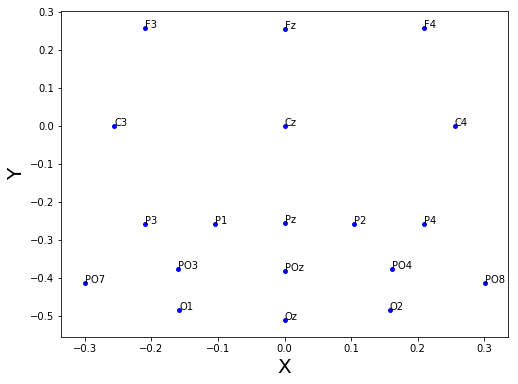

In [23]:
# Cartesian coordinates of the channels

To understand the cartesian coordinates, we can plot the brain channels : 

<img src = 'https://raw.githubusercontent.com/9OP/AML/master/Chall4_ebci/img/brain.png'>

### Data description

The data is composed of epochs of 13 patients : between 25 to 38. For each user, we have a three-dimensional array of shape **(Epochs x Time x Channels)**. 

The sampling frequency of EEG is equal to 500 Hz. The processing use a band-pass filter between 0.1 Hz and 40 Hz.

In order to take into account the moment when the user starts, we should consider the signal between 200 ms to 500 ms. 

Here is an exemple of a specific data from the patient 25, channel 0 and epoch 0 : 

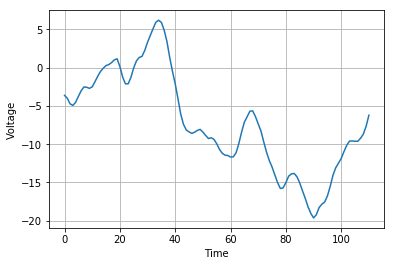

In [28]:
# Channel 0 of epoch 0 of the patient 25

For each patient, we have different number of experiences. 

Here is the size of the data for each patient : 

In [31]:
# Size of the dataset for each patient 

Patient : 32
Size of the dataset : (488, 111, 19)
Patient : 33
Size of the dataset : (581, 111, 19)
Patient : 34
Size of the dataset : (619, 111, 19)
Patient : 35
Size of the dataset : (614, 111, 19)
Patient : 36
Size of the dataset : (567, 111, 19)
Patient : 37
Size of the dataset : (668, 111, 19)
Patient : 38
Size of the dataset : (631, 111, 19)
Patient : 25
Size of the dataset : (329, 111, 19)
Patient : 26
Size of the dataset : (415, 111, 19)
Patient : 27
Size of the dataset : (502, 111, 19)
Patient : 28
Size of the dataset : (481, 111, 19)
Patient : 29
Size of the dataset : (552, 111, 19)
Patient : 30
Size of the dataset : (451, 111, 19)


Therefore it requires to build a classifier for each patient, within the same hyperparameters.

Moreover, as the features are quite close of the number of epochs, this is an issue of **regularisation**.

# Model selection

We started with a baseline model : the **EEGNET_v4** classifier with tuned hyperparameters. 


<img src = 'https://raw.githubusercontent.com/9OP/AML/master/Chall4_ebci/img/architecture.png' width="800">

The first convolution part is in fact a filter bank to split the signal into signals of different frequencies. Indeed, the brain activities have oscillations of different frequencies, and each frequency corresponds to a different brain activity. 

For instance, frequencies greather than 40 Hz are more likely to come from muscle activties.

# TODO ? SPATIAL FILTER EXPLANATION 

# TODO ? TEMPORAL FILTER EXPLANATION 

# Parameter Optimisation

As the problem is more a regularisation issue, tuning the hyperparameters was our main goal.

To do so, we tuned the hyperparameters for the **patient 25** with a number of **epochs** equal to **50** (for sake of time).

## Padding kernel 1 and 2  

To tune the padding of the first kernels, we used a basic loop. 

Here is the summary of the validation score for different padding (x-axis is kernel 1, y-axis is kernel 2)

In [193]:
# Summary of the validation score for different values of padding

Max : 0.6052631578947368 for : 8 and : 16


,8,16,32,64,128
8,0.539474,0.555921,0.444079,0.557018,0.492325
16,0.605263,0.496711,0.521930,0.547149,0.576754
32,0.502193,0.549342,0.574561,0.555921,0.507675
64,0.528509,0.467105,0.472588,0.571272,0.532895
128,0.504386,0.510965,0.571272,0.572368,0.571272


So we can deduce the size of the padding : 
- **Kernel 1 padding : 8**
- **Kernel 2 padding : 16**

## Pooling kernel 1 and 2 

Then, we tuned the pooling for the first kernels, just like before. 

Here is the summary of our results : 

In [195]:
# Summary of the validation score for different values of padding

Max : 0.643640350877193 for : 9 and : 1


,1,2,3,4,5,6,7,8,9
1,0.551535,0.625000,0.550439,0.510965,0.529605,0.572368,0.479167,0.548246,0.643640
2,0.571272,0.529605,0.542763,0.623904,0.485746,0.547149,0.608553,0.591009,0.578947
3,0.583333,0.464912,0.527412,0.481360,0.516447,0.593202,0.493421,0.455044,0.516447
4,0.506579,0.549342,0.598684,0.525219,0.589912,0.551535,0.519737,0.581140,0.525219
5,0.508772,0.526316,0.587719,0.502193,0.564693,0.611842,0.582237,0.562500,0.538377
6,0.553728,0.537281,0.543860,0.512061,0.549342,0.581140,0.533991,0.551535,0.523026
7,0.382675,0.585526,0.530702,0.495614,0.627193,0.570175,0.553728,0.584430,0.591009
8,0.498904,0.598684,0.494518,0.486842,0.526316,0.423246,0.577851,0.527412,0.544956
9,0.500000,0.507675,0.494518,0.530702,0.548246,0.460526,0.435307,0.410088,0.491228


So we can deduce the size of the pooling : 
- **Kernel 1 pooling : 9**
- **Kernel 2 pooling : 1**

# Filter size

Then, we modified the size of the filter used for both kernel 1 and kernel 2.

Here is a summary of our results : 

In [39]:
# Summary of the validation score for different values of filter size

Max : 0.7554824561403509 for : 2 and : 3


,1,3,5,7,9,11,13,15,17
1,0.422149,0.621711,0.560307,0.489035,0.540570,0.527412,0.570175,0.478070,0.516447
2,0.637061,0.755482,0.615132,0.515351,0.495614,0.421053,0.559211,0.564693,0.541667
3,0.461623,0.661184,0.723684,0.413377,0.484649,0.543860,0.487939,0.426535,0.442982
4,0.725877,0.611842,0.581140,0.638158,0.570175,0.424342,0.514254,0.438596,0.495614
5,0.580044,0.553728,0.508772,0.578947,0.616228,0.494518,0.513158,0.581140,0.486842
6,0.631579,0.617325,0.606360,0.512061,0.634868,0.698465,0.557018,0.537281,0.453947
7,0.581140,0.614035,0.541667,0.535088,0.520833,0.557018,0.691886,0.571272,0.570175
8,0.609649,0.593202,0.484649,0.539474,0.547149,0.557018,0.538377,0.530702,0.343202
9,0.682018,0.598684,0.553728,0.532895,0.529605,0.512061,0.496711,0.501096,0.573465


So we can deduce the filter size : 
- **Filter 1 size : 3x3**
- **Filter 2 size : 2x2**

So finally the hyperparameters used are the following : 


In [41]:
params = {'resample_to': 369,
                 'D': 2,
                 'F1': 3,
                 'dropoutRate1': 0.52,
                 'dropoutRate2': 0.36,
                 'lr': 0.00066,
                 'norm_rate': 0.275,
                 'kernLength1' : 8,
                  'kernLength2' : 16,
              'poolKern1' : 9,  
              'poolKern2' : 1  
                 }

Note the the other hyperparameters were already tuned. We trusted this tune work and decided not to dig into new tuning.

# VARIATIONAL DROPOUT ???????????????????????

# Model evaluation

To evaluate the performance of the classifier, the performance metric is the AUC (Area Under the Curve) of the ROC. 

The testing set is made from 20% EEG epochs of each class for each subject. 

As each subject is different, it would be wrong to consider the same classifier for every patient. 

Therefore, the classifier architecture and hyperparameters are the same for each patient but the training process is made separately for each patient.

For the validation, a baseline splited the data into training and testing subsets for each patient. For the training part, a cross validation has been implemented with 4 folds. To then test the model, the number of epochs used was the mean for the optimal epoch for each fold of the cross-validation.

<img src = 'https://raw.githubusercontent.com/9OP/AML/master/Chall4_ebci/img/validation.png ' width="400">

# Results 

After the tuning of the hyperparameters, we then use the obtained model to test the score on the testing set.

Here are our results for each patient : 

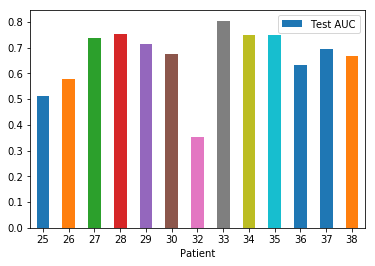

In [22]:
# Plot of the AUC score with the testing set

And then the average of AUC for all the patients (to have an idea how well is the architecture of our model and the hyperparameters)

Average AUC score : 0.6623912462174913


# Critics 

There are few things we could have done differently.
Here are some thoughts of what we did wrong or we could have done better : 

- During the tuning of hyperparameters, we only used the patient 25 and 50 epochs. Indeed, 50 epochs doesn't seem to be enough if we want a precise result, but it seems to have worked well for our purpose.
- It remains some overfitting which means the regularisation work could have been better. A basic way to decrease the overfitting would have been to increase the number of data we have. Neverhteless, this is impossible to do it efficiently. Indeed, the data was created for each patient by a series of experiences. Running too much BCI could lead to decrease the effiency of the data : the fatigue of the patient could decrease the reliability of the epochs.
- Some critics about the experience on itself. As sais previoulsy, it is hard to have a lot of data to decrease the phenonenon of overfitting. A way to deal with this would be to create a generic BCI model that could generalizes to each subject. This is **transfer learning**, and this is not what was required from us. 




